# ANÁLISIS INICIAL DATOS BURSÁTILES

¡Bienvenidos al capítulo de Análisis de Datos Bursátiles con Python! En este notebook, exploraremos las herramientas y técnicas necesarias para analizar datos financieros y tomar decisiones informadas en el mundo de las inversiones.

**Temas a Tratar**

Durante este capítulo, abordaremos una variedad de temas relacionados con el análisis de datos bursátiles. Algunos de los temas clave que exploraremos incluyen:

1. DESCARGA DE DATOS

Aprenderemos cómo descargar datos OHLC históricos de precios de activos financieros, como acciones, índices, de fuentes como Yahoo Finance. También veremos cómo cargar datos desde archivos locales.

2. ANÁLISIS Y TRATAMIENTO INICIAL

Realizaremos un análisis inicial de los datos para comprender su estructura y contenido. Esto incluirá la exploración de estadísticas descriptivas básicas y la identificación de posibles problemas de calidad de datos.

Abordaremos cuestiones comunes en la manipulación de datos financieros, como la eliminación de valores faltantes (NaN), la alineación de datos en función de las fechas y la normalización de los precios.

3. GRÁFICOS DE PRECIOS

Aprenderemos a crear gráficos de precios que nos permitirán visualizar la evolución de los activos financieros a lo largo del tiempo. Exploraremos gráficos de líneas, gráficos de velas y gráficos de precios normalizados para comparar el rendimiento de diferentes activos.

4. CÁLCULO DE RENTABILIDADES Y VOLATILIDAD

Calcular las rentabilidades diarias, mensuales y anuales es esencial para evaluar el rendimiento de los activos financieros. También estudiaremos cómo calcular la volatilidad, una medida clave de riesgo en los mercados financieros.

5. DISTRIBUCIÓN DE RENTABILIDADES

Exploraremos la distribución de probabilidad de los retornos de los activos financieros. Comprender esta distribución es fundamental para la gestión de riesgos y la toma de decisiones de inversión.

In [21]:
%pip install yfinance
%pip install plotly
%pip install mplfinance

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
import mplfinance as mpf
import scipy.stats as stats
import seaborn as sns

plt.style.use('ggplot')

## DESCARGA DE DATOS

LO PRIMERO VAMOS A ENTENDER EL SIGNIFICADO DE LOS DATOS OHLC QUE VAMOS A UTILIZAR

* OPEN: Precio de apertura del activo financiero
* HIGH: Precio máximo del activo financiero
* LOW: Precio mínimo del activo financiero
* CLOSE: Precio de cierre del activo financiero


¿CUÁL ES LA DIFERENCIA ENTRE PRECIO DE CIERRE (Close) Y PRECIO DE AJUSTE (Adj Close)?

Para entender la diferencia, vamos a analizar el efecto de los splits y de los dividendos en los precios de las acciones:

* Un **split** es una división de las acciones de una empresa en varias acciones. Por ejemplo, si una acción vale 100 euros y se hace un split de 1 a 2, entonces cada acción valdrá 50 euros. El número de acciones se duplica y el precio se divide por dos.

* Un **dividendo** es un pago que hace una empresa a sus accionistas. Por ejemplo, si una acción vale 100 euros y se paga un dividendo de 5 euros, entonces el precio de la acción bajará a 95 euros.

Para ello, vamos a descargar los datos del Banco Santander de Yahoo Finance y vamso a ver los datos Close y Adj Close:

* **Close**: es el precio de cierre sin ajustar por dividendos y splits.

* **Adj Close**: es el precio de cierre ajustado por dividendos y splits. Es el precio que se utiliza para calcular las rentabilidades.


Nos  bajamos los datos de Yahoo Finance:

In [23]:
start_date = '2010-01-01'
end_date = '2020-12-31'

san_OHLC_df = yf.download(tickers="SAN.MC", start = start_date, end = end_date)

san_OHLC_df.head(2)


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10.740401,10.916778,10.740401,10.916778,4.770324,50597478
2010-01-05,10.926061,11.093154,10.926061,11.037456,4.823057,60515839


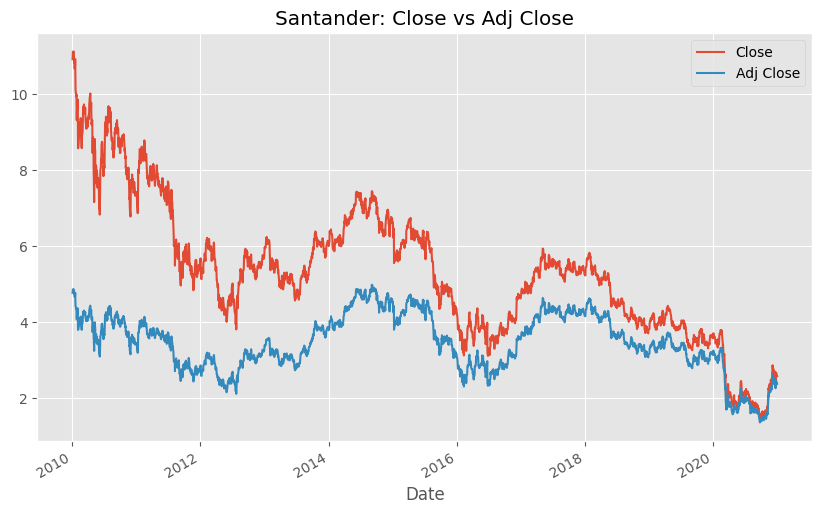

In [24]:
# Hacemos un gráfico con los precios de cierre y ajustado
san_OHLC_df[['Close', 'Adj Close']].plot(figsize=(10, 6))
plt.title('Santander: Close vs Adj Close');

También podemos bajarnos la información sobre dividendos y splits de Yahoo Finance.

In [25]:
# Crear un objeto para el símbolo de Banco Santander
symbol = "SAN.MC"  # SAN.MC es el símbolo de Banco Santander en el mercado continuo español

# Descargar los datos de dividendos
san_data = yf.Ticker(symbol)
san_div = san_data.dividends[start_date:end_date]

# Descargar los datos de splits
san_split = san_data.splits[start_date:end_date]

print("\nFechas de Splits:")
print(san_split)

print("\n")

print("Fechas de Dividendos:")
print(san_div)




Fechas de Splits:
Date
2011-01-17 00:00:00+01:00    1.015385
2020-11-16 00:00:00+01:00    1.043478
Name: Stock Splits, dtype: float64


Fechas de Dividendos:
Date
2010-02-01 00:00:00+01:00    0.114125
2010-05-03 00:00:00+02:00    0.205921
2010-08-02 00:00:00+02:00    0.125537
2010-10-15 00:00:00+02:00    0.110467
2011-01-17 00:00:00+01:00    0.108611
2011-05-02 00:00:00+02:00    0.215629
2011-08-01 00:00:00+02:00    0.127468
2011-10-17 00:00:00+02:00    0.118764
2012-01-16 00:00:00+01:00    0.112166
2012-04-13 00:00:00+02:00    0.207366
2012-07-13 00:00:00+02:00    0.143271
2012-10-17 00:00:00+02:00    0.141386
2013-01-15 00:00:00+01:00    0.143271
2013-04-12 00:00:00+02:00    0.141386
2013-07-15 00:00:00+02:00    0.141386
2013-10-16 00:00:00+02:00    0.144214
2014-01-15 00:00:00+01:00    0.143271
2014-04-09 00:00:00+02:00    0.110950
2014-07-15 00:00:00+02:00    0.143271
2014-10-20 00:00:00+02:00    0.142329
2015-01-14 00:00:00+01:00    0.137616
2015-04-14 00:00:00+02:00    0.142329


AHORA NOS BAJAMOS DATOS DE ALGUNOS DE LOS ÍNDICES BURSÁTILES MÁS IMPORTANTES DEL MUNDO

In [26]:
# Definimos un diccionarios con los índices que vamos a utilizar
indices_dic = {'sp500': '^GSPC', #EEUU S&P 500
               'dax': '^GDAXI', #Alemania DAX 30
               'ftse': '^FTSE', #Londres FTSE 100
               'ibex': '^IBEX'} #España IBEX 35

In [27]:
# si quiero buscar los datos del sp500 y no me sé el ticker
indices_dic['sp500']

'^GSPC'

In [28]:
#si quiero bajarme todos los datos de los índices
list(indices_dic.values())

['^GSPC', '^GDAXI', '^FTSE', '^IBEX']

In [29]:
#nos bajamos los datos de Yahoo Finance
precios_OHLC = yf.download(list(indices_dic.values()))


[*********************100%%**********************]  4 of 4 completed


Vemos qué forma tienen los datos bajados

In [30]:
precios_OHLC.head(2)

Adj Close                     Close                      High  \
               ^FTSE ^GDAXI  ^GSPC ^IBEX ^FTSE ^GDAXI  ^GSPC ^IBEX ^FTSE   
Date                                                                       
1927-12-30       NaN    NaN  17.66   NaN   NaN    NaN  17.66   NaN   NaN   
1928-01-03       NaN    NaN  17.76   NaN   NaN    NaN  17.76   NaN   NaN   

                   ...    Low        Open                     Volume         \
           ^GDAXI  ...  ^GSPC ^IBEX ^FTSE ^GDAXI  ^GSPC ^IBEX  ^FTSE ^GDAXI   
Date               ...                                                        
1927-12-30    NaN  ...  17.66   NaN   NaN    NaN  17.66   NaN    NaN    NaN   
1928-01-03    NaN  ...  17.76   NaN   NaN    NaN  17.76   NaN    NaN    NaN   

                        
           ^GSPC ^IBEX  
Date                    
1927-12-30   0.0   NaN  
1928-01-03   0.0   NaN  

[2 rows x 24 columns]

In [31]:
precios_OHLC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24307 entries, 1927-12-30 to 2023-10-16
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, ^FTSE)   10050 non-null  float64
 1   (Adj Close, ^GDAXI)  9050 non-null   float64
 2   (Adj Close, ^GSPC)   24063 non-null  float64
 3   (Adj Close, ^IBEX)   7665 non-null   float64
 4   (Close, ^FTSE)       10050 non-null  float64
 5   (Close, ^GDAXI)      9050 non-null   float64
 6   (Close, ^GSPC)       24063 non-null  float64
 7   (Close, ^IBEX)       7665 non-null   float64
 8   (High, ^FTSE)        10050 non-null  float64
 9   (High, ^GDAXI)       9050 non-null   float64
 10  (High, ^GSPC)        24063 non-null  float64
 11  (High, ^IBEX)        7665 non-null   float64
 12  (Low, ^FTSE)         10050 non-null  float64
 13  (Low, ^GDAXI)        9050 non-null   float64
 14  (Low, ^GSPC)         24063 non-null  float64
 15  (Low, ^IBEX)       

In [32]:
precios_OHLC.isna().sum()

Adj Close  ^FTSE     14257
           ^GDAXI    15257
           ^GSPC       244
           ^IBEX     16642
Close      ^FTSE     14257
           ^GDAXI    15257
           ^GSPC       244
           ^IBEX     16642
High       ^FTSE     14257
           ^GDAXI    15257
           ^GSPC       244
           ^IBEX     16642
Low        ^FTSE     14257
           ^GDAXI    15257
           ^GSPC       244
           ^IBEX     16642
Open       ^FTSE     14257
           ^GDAXI    15257
           ^GSPC       244
           ^IBEX     16642
Volume     ^FTSE     14257
           ^GDAXI    15257
           ^GSPC       244
           ^IBEX     16642
dtype: int64

Veo cómo se puede accerder a los datos

In [33]:
precios_OHLC['Close'].head(2)

,^FTSE,^GDAXI,^GSPC,^IBEX
Date,,,,
1927-12-30,NaN,NaN,17.66,NaN
1928-01-03,NaN,NaN,17.76,NaN


Genero un dataframe con los valores OHLC del sp500

In [34]:
#defino el ticker que voy a utilizar
ticker = indices_dic['sp500']

#genero el dataframe usando un diccionario
sp500_OHLC = pd.DataFrame({
    'Open': precios_OHLC['Open'][ticker],
    'High': precios_OHLC['High'][ticker],
    'Low': precios_OHLC['Low'][ticker],
    'Close': precios_OHLC['Close'][ticker],
    'Adj Close': precios_OHLC['Adj Close'][ticker],
    'Volume': precios_OHLC['Volume'][ticker]
})

sp500_OHLC.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.66,17.66,17.66,17.66,17.66,0.0
1928-01-03,17.76,17.76,17.76,17.76,17.76,0.0


Vamos a realizar una gráfica de velas con los precios del sp500 del año 2018 

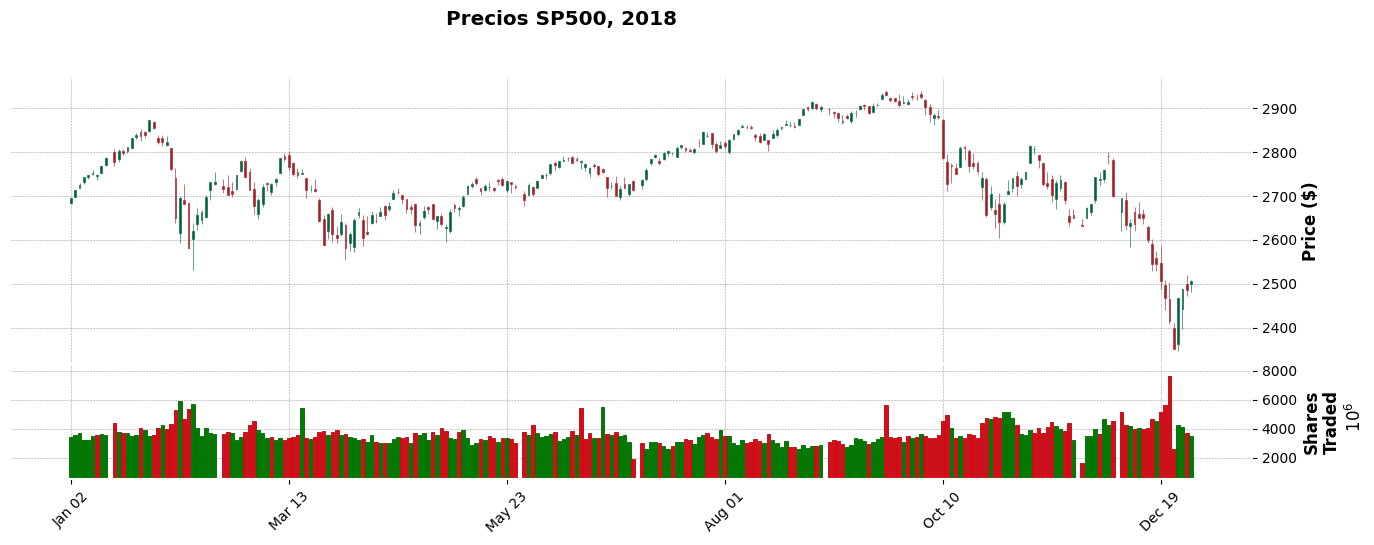

In [36]:
mpf.plot(
            sp500_OHLC.loc['2018'], #seleccionamos los datos de 2018
            type='candle', #tipo de gráfico
            style='charles', #estilo del gráfico
            title='Precios SP500, 2018',
            ylabel='Price ($)',
            volume=True, #añade el gráfico de volumen
            ylabel_lower='Shares\nTraded',
            figratio=(30, 10), #tamaño del gráfico
            )

EJERCICIO: Crea una gráfica de velas con los datos del mes de julio del año 2018 del índice sp500

## ANÁLISIS Y TRATAMIENTO INICIAL

A PARTIR DE AHORA VAMOS A TRABAJAR CON LOS PRECIOS DE CIERRE AJUSTADOS

Genero un dataframe con los valores de cierre de los índices

In [38]:
# me quedo con los datos de cierre ajustados
precios_df = precios_OHLC['Adj Close']

#cambio los nombres a las columnas
precios_df.columns = list(indices_dic.keys())

precios_df.head(2)

,sp500,dax,ftse,ibex
Date,,,,
1927-12-30,NaN,NaN,17.66,NaN
1928-01-03,NaN,NaN,17.76,NaN



Hago un gráfico inicial

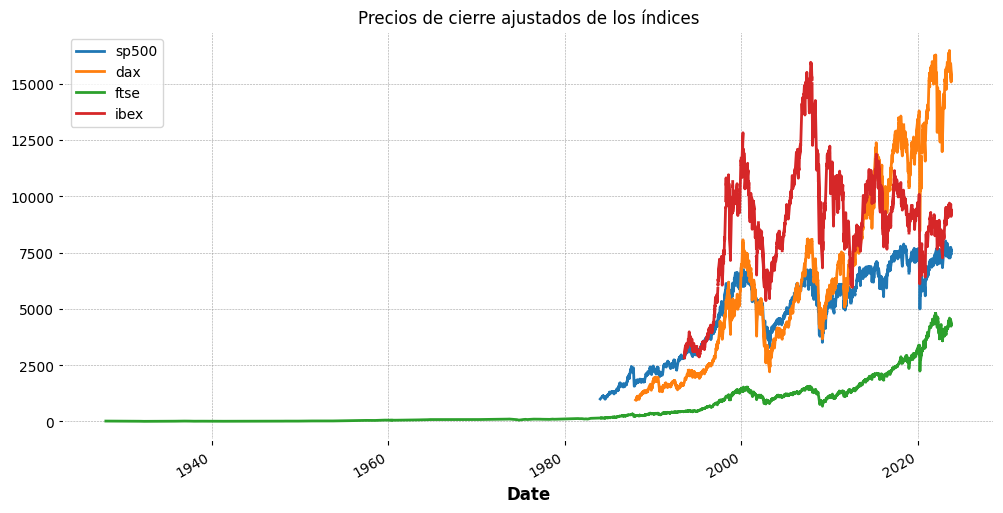

In [17]:
precios_df.plot(figsize=(12,6));
plt.title('Precios de cierre ajustados de los índices');

Veo que el SP500 tiene valores durante un periodo de tiempo más amplio que el resto de índices. Voy a quedarme con el periodo de tiempo que tienen todos los índices

In [18]:
precios_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24306 entries, 1927-12-30 to 2023-10-13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp500   10049 non-null  float64
 1   dax     9049 non-null   float64
 2   ftse    24062 non-null  float64
 3   ibex    7664 non-null   float64
dtypes: float64(4)
memory usage: 949.5 KB


Eliminamos los NANs:
* Primero eliminamos las filas con todos los valores a Nan
* Luego eliminamos las filas con algún valor a Nan

In [19]:
# Filas con todos los valores a NaN
precios_df.dropna(how='all' ,inplace=True)
precios_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24306 entries, 1927-12-30 to 2023-10-13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp500   10049 non-null  float64
 1   dax     9049 non-null   float64
 2   ftse    24062 non-null  float64
 3   ibex    7664 non-null   float64
dtypes: float64(4)
memory usage: 949.5 KB


/tmp/ipykernel_11123/828518843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precios_df.dropna(how='all' ,inplace=True)


In [20]:
# Filas con al menos un valor a NaN
precios_df.dropna(how='any' ,inplace=True)
precios_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7323 entries, 1993-07-12 to 2023-10-13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp500   7323 non-null   float64
 1   dax     7323 non-null   float64
 2   ftse    7323 non-null   float64
 3   ibex    7323 non-null   float64
dtypes: float64(4)
memory usage: 286.1 KB


/tmp/ipykernel_11123/4106312015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precios_df.dropna(how='any' ,inplace=True)


VUELVO A HACER LA GRÁFICA CON LOS PRECIOS

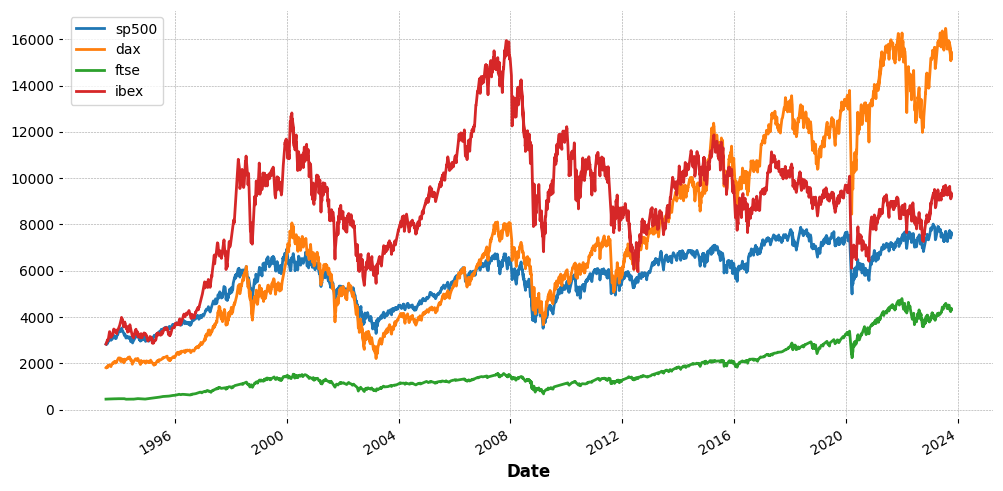

In [21]:
precios_df.plot(figsize=(12,6));

Para poder comparar los índices, normalizamos los datos

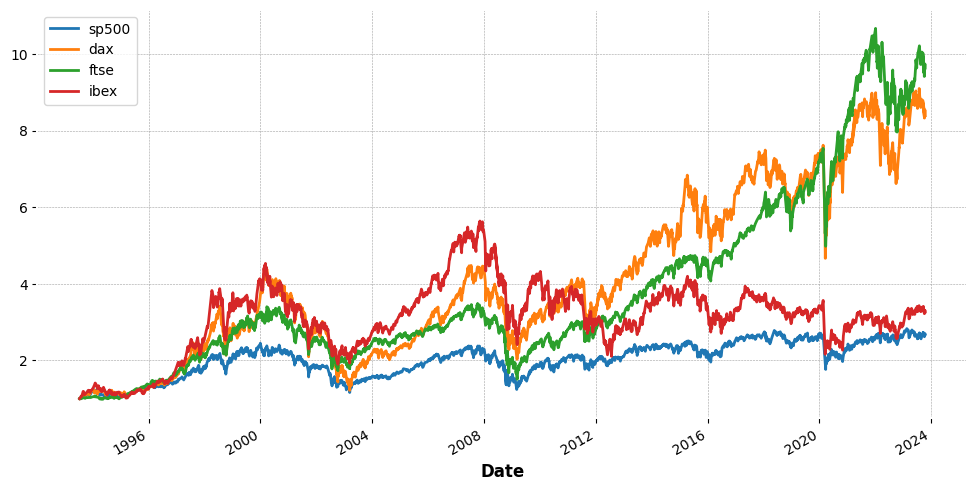

In [22]:
# Dividimos los precios por el primer valor, de forma que todos los precios empiecen en 1
precios_unif_df = precios_df / precios_df.iloc[0]

precios_unif_df.plot(figsize=(12,6));

Veamos ahora qué ocurre si tenemos dos fuentes de datos distintas, tendremos que mezclar y normalizar los datos

Leemos los datos del Ibex desde ficheros csv

In [3]:
# cargamos los datos

# para ejecutar en local
# ibex = pd.read_csv('data/ibex.csv', index_col=0, parse_dates=True).close
# ibex_div = pd.read_csv('data/ibex_div.csv', index_col=0, parse_dates=True).close

# para ejecutar en colab
ibex = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/ibex.csv', index_col=0, parse_dates=True).close
ibex_div = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/ibex_div.csv', index_col=0, parse_dates=True).close
data_ibex = pd.concat([ibex, ibex_div], axis=1).dropna()
data_ibex.columns = ['ibex', 'ibex_div']

Hacemos unas gráficas iniciales

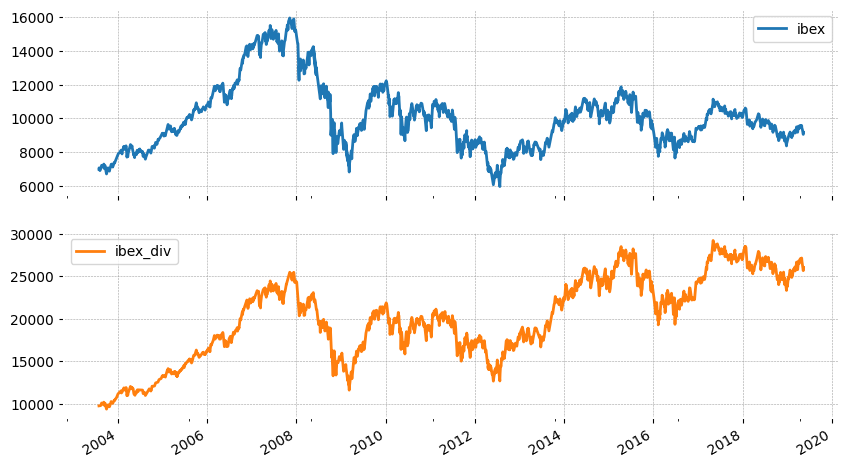

In [24]:
data_ibex.plot(subplots=True, figsize=(10, 6));

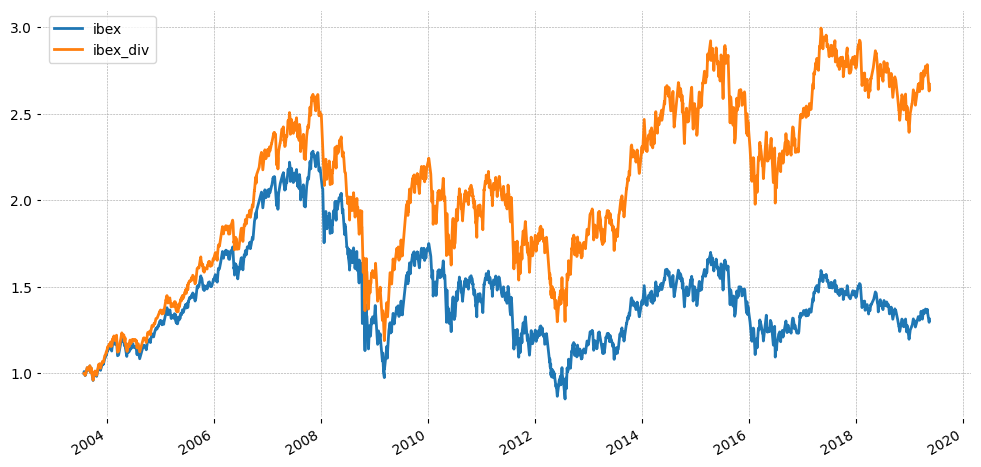

In [25]:
#unificamos los datos para poder comparar
ibex_unif = data_ibex/data_ibex.iloc[0]

ibex_unif.plot(figsize=(12, 6));

OJO: Los datos del Ibex y del resto de índices no corresponden a las mismas fechas, por lo que tenemos que hacer un merge de los datos

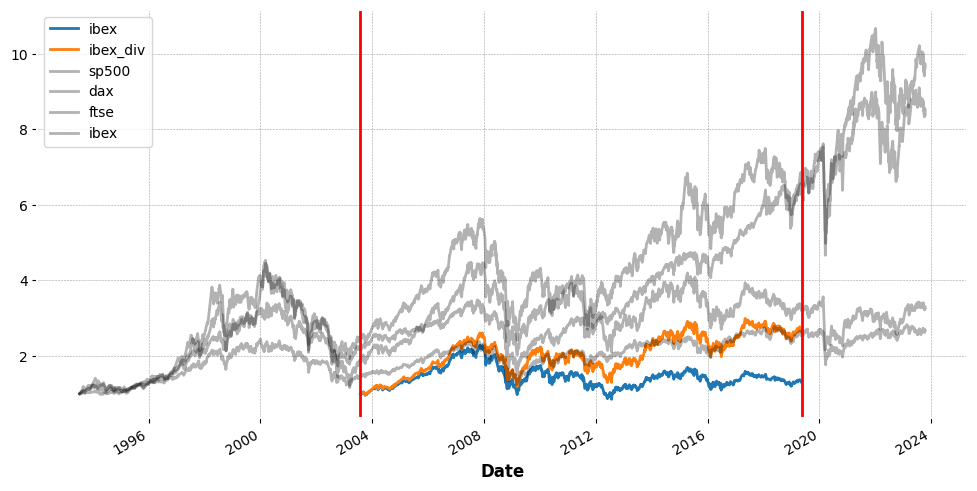

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
ibex_unif.plot(ax=ax)
precios_unif_df.plot(ax=ax, color='k', alpha=0.3);
plt.axvline(x=ibex_unif.index[0],color='r')
plt.axvline(x=ibex_unif.index[-1],color='r');


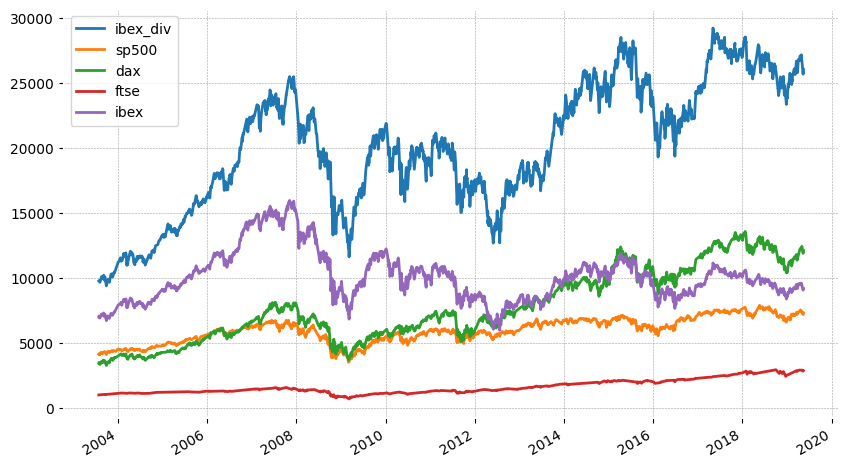

In [27]:
#juntamos los dos dataframes en uno solo pero nos aseguramos de que las fechas sean las mismas
ind_fin_df = pd.concat([data_ibex['ibex_div'], precios_df], axis=1).dropna()

#hacemos un gráfico con los índices
ind_fin_df.plot(figsize=(10, 6));


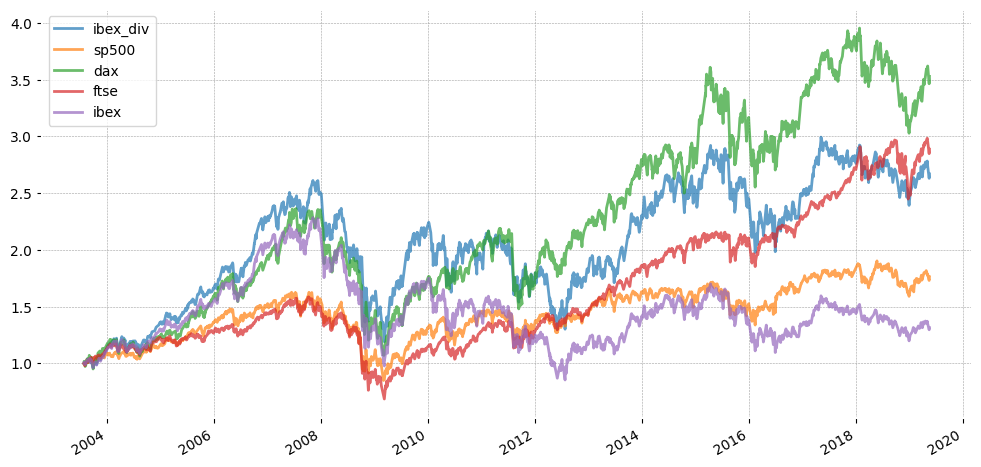

In [28]:
# normalizamos los precios
ind_fin_unif_df = ind_fin_df / ind_fin_df.iloc[0]

#hacemos un gráfico con los índices normalizados
ind_fin_unif_df.plot(figsize=(12,6), alpha=0.7);

CUIDADO: AL comparar índices, tenemos que tener claro si incluyen o no dividendos. En este caso, el índice del Ibex no incluye dividendos.

## CÁLCULO DE RENTABILIDADES Y RIESGO

La teoría financiera siempre ha caracterizado por:

Los inversores tienen **aversión al riesgo**

Los activos los representamos por el **binomio rentabilidad-riesgo**:

La **rentabilidad** se mide como la media de los rentornos

El **riesgo** se mide a través de la volatilidad, que es la desviación estándar de los rendimientos.

Vamos a verlo con algunos datos reales.

### Primero calculamos los retornos

Existen dos formas de convertir precios en rendimientos:

* Rendimientos aritméticos: $r_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} -1$
 

* Rendimientos logarítmicos: $r_t = \log(\frac{P_t}{P_{t-1}}) = log(P_t) - log(P_{t-1})$
 

Los **rendimientos aritmeticos** se pueden sumar entre activos para obtener el rendimiento de la cartera. Los rendimientos logarítmicos no se pueden sumar.

Los **rendimientos logarítmicos** se pueden sumar en el tiempo para obtener el rendimiento total. Los rendimientos aritméticos no se pueden sumar.

Los rendimiento aritméticos siguen una distribución lognormal. **Los rendimientos logarítmicos siguen una distribución normal**.

Ambos rendimientos son equivalentes cuando los rendimientos son pequeños. Veamos como se comportan los rendimientos aritméticos y logarítmicos para distintos valores de rendimiento:

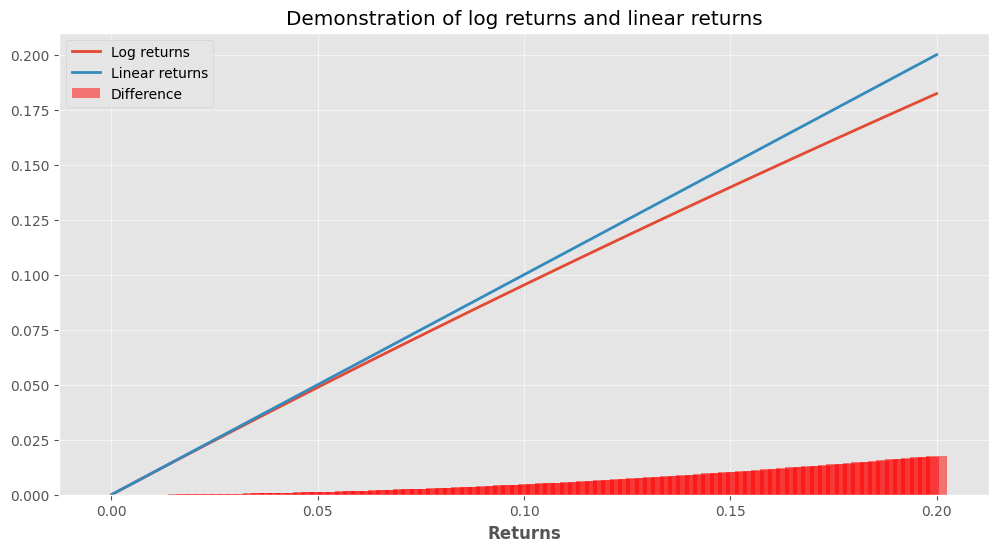

In [29]:
plt.style.use('ggplot')
x_returns = np.linspace(0.0001, .2, 100) # Generate 100 numbers between 0.0001 and 0.2
y_returns = np.log(1 + x_returns) # Calculate the logarithmic returns from the linear returns

# Plot the linear and log returns
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(x_returns, y_returns, label='Log returns') # Plot the log returns
plt.plot(x_returns, x_returns, label='Linear returns') # Plot the linear returns
plt.bar(x_returns, x_returns-y_returns, width=0.005, color='r', alpha=0.5, label='Difference', ) # Plot the difference between the two returns
plt.legend()
plt.xlabel('Returns')
plt.title('Demonstration of log returns and linear returns');

A partir de ahora vamos a trabajar con retornos logarítmico.

VAMOS A CALCULAR RETORNOS DIARIOS, MENSUALES Y ANUALES

Calcula el retorno diario de un dataframe con los precios diarios

In [30]:
ret_df = np.log(ind_fin_df).diff().dropna()

Calcular los retornos mensuales de un dataframe con los precios diarios

In [31]:
#Primero calculamos los precios mensuales, para ello nos quedamos con los precios a final de mes
ind_fin_men_df = ind_fin_df.resample('M').last()

#Calculamos los retornos mensuales
ret_fin_men = np.log(ind_fin_men_df).diff().dropna()

#Veamos un ejemplo de los precios mensuales
ind_fin_men_df.head(5)

,ibex_div,sp500,dax,ftse,ibex
2003-07-31,9755.3,4157.000000,3487.860107,990.309998,7061.692871
2003-08-31,9947.1,4161.100098,3484.580078,1008.010010,7111.292480
2003-09-30,9377.0,4091.300049,3256.780029,995.969971,6703.593262
2003-10-31,10055.5,4287.600098,3655.989990,1050.709961,7129.492676
2003-11-30,10250.0,4342.600098,3745.949951,1058.199951,7252.492676


In [32]:
#Primero calculamos los precios anuales, para ello nos quedamos con los precios a final de año
ind_fin_año_df = ind_fin_df.resample('Y').last()

#Calculamos los retornos anuales
ret_fin_año = np.log(ind_fin_año_df).diff().dropna()

#Veamos un ejemplo de los precios anuales
ind_fin_año_df.head(5)

,ibex_div,sp500,dax,ftse,ibex
2003-12-31,10935.0,4470.399902,3965.159912,1109.640015,7737.192383
2004-12-31,13241.2,4820.100098,4256.080078,1213.550049,9080.791016
2005-12-31,16152.2,5618.799805,5408.259766,1248.290039,10733.889648
2006-12-31,21974.0,6220.799805,6596.919922,1418.300049,14146.485352
2007-12-31,24327.5,6476.899902,8067.319824,1478.489990,15182.284180


HACEMOS UN GRÁFICO DE BARRAS DE LOS RETORNOS ANUALES

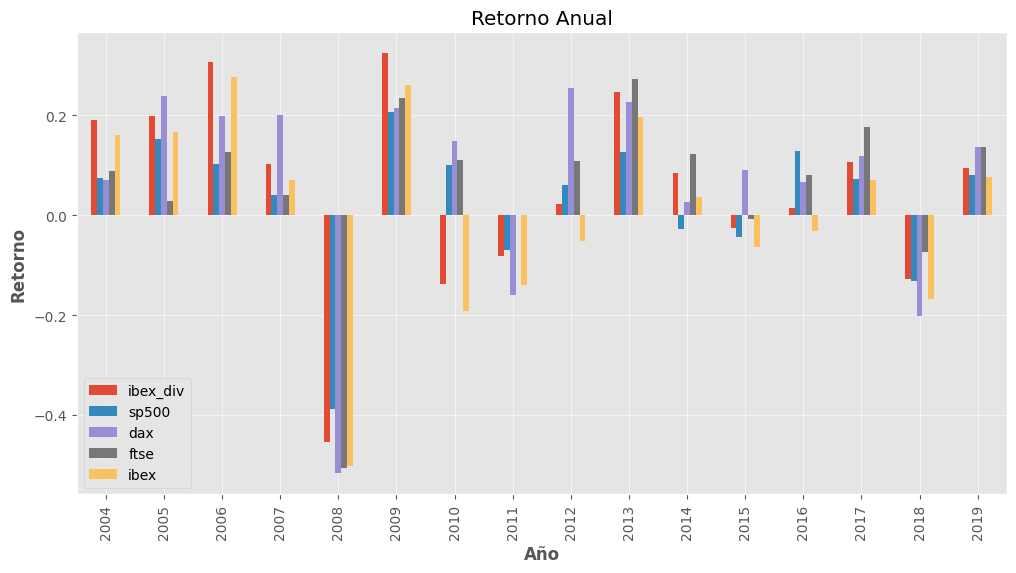

In [33]:
# Crear un gráfico de barras
ax = ret_fin_año.plot(kind='bar', legend=True, figsize=(12, 6))

# Configurar el eje X para mostrar solo los años
years = ret_fin_año.index.year
ax.set_xticklabels(years)

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Retorno')
plt.title('Retorno Anual')

# Mostrar el gráfico
plt.show()

AHORA VAMOS A USAR DATOS DE ACCIONES DE ACTIVOS AMERICANOS

Nos bajamos dos grupos de activos que nos servirán para analizar distintas cosas más adelante

In [5]:
# para correr en loacal
# data_OHLC_df = pd.read_excel('data/data_OHLC.xlsx', header=[0, 1], index_col=0, parse_dates=True)
# data_OHLC_df_corr = pd.read_excel('data/data_OHLC_corr.xlsx', header=[0, 1], index_col=0, parse_dates=True)

# para correr en colab
data_OHLC_df_corr = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/7_Analisis_Info_Bolsa/data/data_OHLC.csv',
                                header=[0, 1],
                                index_col=0,
                                parse_dates=True)  

data_OHLC_df = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/7_Analisis_Info_Bolsa/data/data_OHLC_corr.csv',
                            header=[0, 1],
                            index_col=0,
                            parse_dates=True)

Nos quedamos con los datos de cierre de cada día y calculamos los rendimientos diarios.

In [27]:
data_close_df = data_OHLC_df['Adj Close'].dropna()
ret_close_df = np.log(data_close_df).diff().dropna()

data_close_df_corr = data_OHLC_df_corr['Adj Close'].dropna()
ret_close_df_corr = np.log(data_close_df_corr).diff().dropna()

In [60]:
# Puedes calcular los valores medios y la desviación estándar de cada columna así:
means = ret_close_df.mean()
stds = ret_close_df.std()
means_corr = ret_close_df_corr.mean()
stds_corr = ret_close_df_corr.std()

In [61]:
# Veamos los valores medios de cada columna
means

AAPL       0.000903
BTC-USD    0.001821
ELE.MC     0.000352
IAU        0.000167
IEF        0.000016
TSLA       0.001200
dtype: float64

Podemos analizar le rentabilidad y el riesgo de cada activo por separado y hacer una gráfica

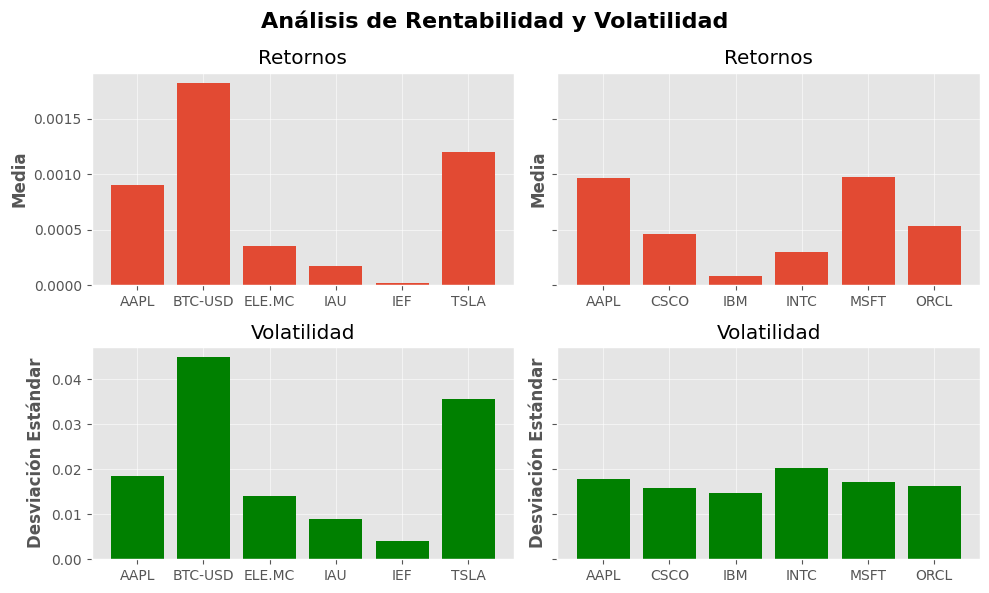

In [28]:
# Crear una figura con cuatro subplots, dos en cada una de las dos filas
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey='row')

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0, 0].bar(means.index, means.values)
axes[0, 0].set_ylabel('Media')
axes[0, 0].set_title('Retornos')

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1, 0].bar(stds.index, stds.values,color='green')
axes[1, 0].set_ylabel('Desviación Estándar')
axes[1, 0].set_title('Volatilidad')

#Crear una figura con dos subplots, uno encima del otro
axes[0, 1].bar(means_corr.index, means_corr.values)
axes[0, 1].set_ylabel('Media')
axes[0, 1].set_title('Retornos')

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1, 1].bar(stds_corr.index, stds_corr.values,color='green')
axes[1, 1].set_ylabel('Desviación Estándar')
axes[1, 1].set_title('Volatilidad')

# Añadir un título general a la figura
plt.suptitle('Análisis de Rentabilidad y Volatilidad', fontsize=16)  # Título general

# Ajustar el espaciado entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## DISTRIBUCIÓN DE RENTABILIDADES

Hemos calculado los retornos medios, ahora vamos a ver la distribución que siguen los retornos diarios.

Vemos que la distribución de los retornos diarios es muy parecida a una distribución normal, pero no es exactamente igual.

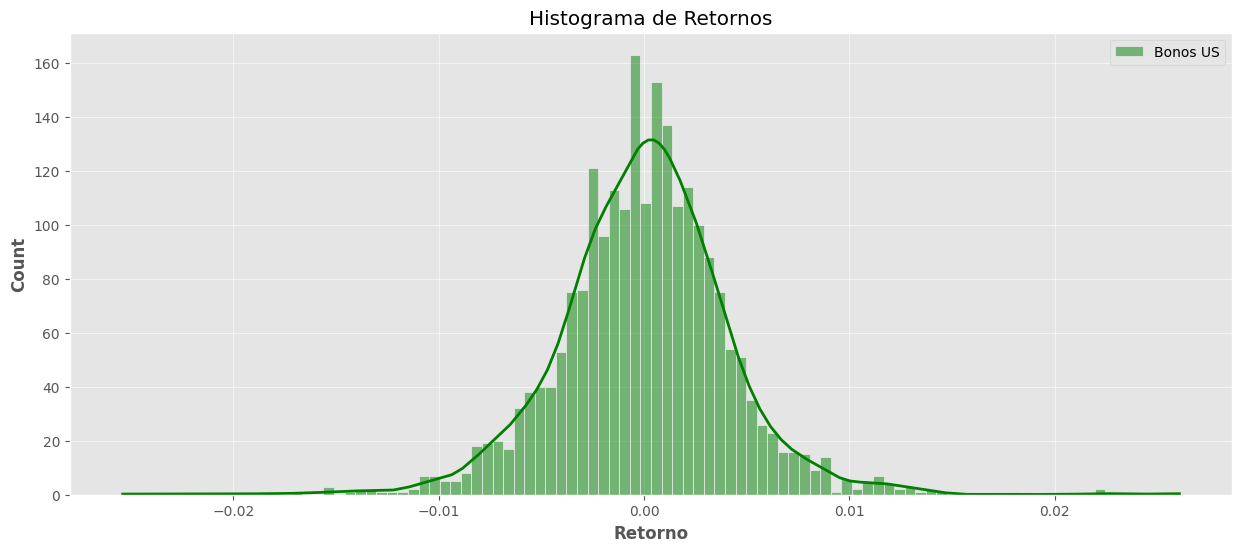

In [62]:
#hacemos un histograma de los retornos de los Bonos americanos
fig, ax1 = plt.subplots(figsize=(15, 6))
sns.histplot(data=ret_close_df, x='IEF', ax=ax1, bins=100, color='green', kde=True, alpha=0.5, label='Bonos US')
ax1.set_xlabel('Retorno')
plt.legend()
plt.title('Histograma de Retornos');
plt.show()

Veamos qué ocurre si comparamos los retornos de los bonos (poca volatilidad) con los retornos de Bitcoin (mucha volatilidad)

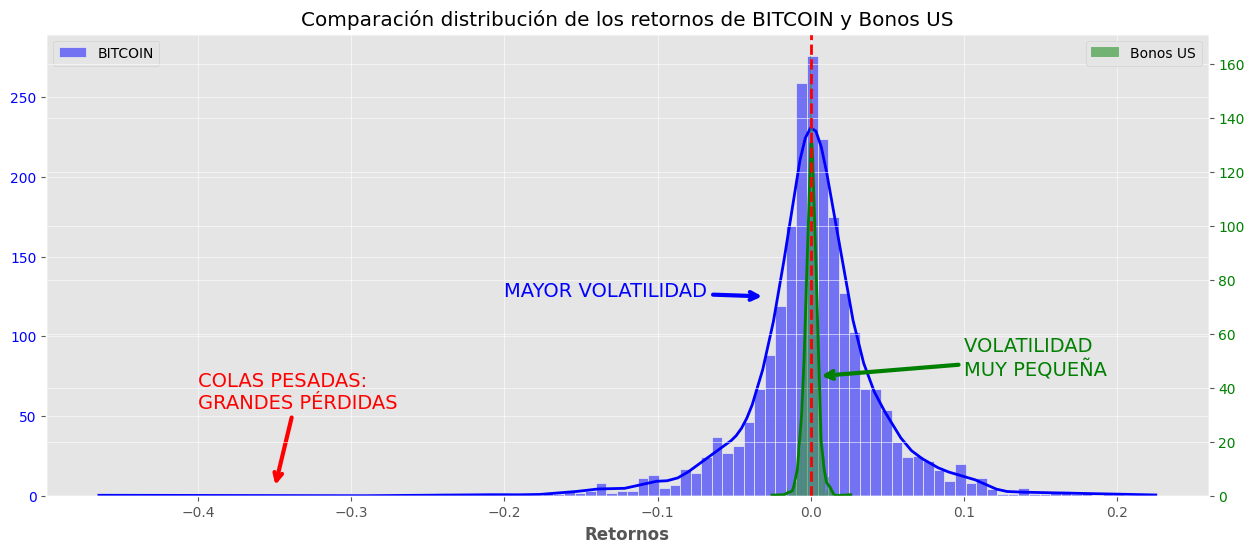

In [30]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Crear el primer gráfico con sns.histplot
sns.histplot(data=ret_close_df, x='BTC-USD', ax=ax1, bins=100, color='blue', kde=True, alpha=0.5, label='BITCOIN')
ax1.set_xlabel('Retornos')
ax1.set_ylabel('', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# # Añadir texto en ax2
# text_x = -0.4
# text_y = 25

#ax1.text(-0.2, 125, f"MAYOR VOLATILIDAD", fontsize=12, color='blue')

ax1.annotate('MAYOR VOLATILIDAD', xy=(-0.03, 125), xytext=(-0.2, 125),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='blue'),
            fontsize=14, color='blue')

ax1.annotate('VOLATILIDAD \nMUY PEQUEÑA', xy=(0.005, 75), xytext=(0.1, 75),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='green'),
            fontsize=14, color='green')

ax1.annotate('COLAS PESADAS: \nGRANDES PÉRDIDAS', xy=(-0.35, 5), xytext=(-0.4, 55),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='red'),
            fontsize=14, color='RED')



# Duplicar el eje Y para el segundo gráfico
ax2 = ax1.twinx()

# Crear el segundo gráfico con sns.histplot
sns.histplot(data=ret_close_df, x='IEF', ax=ax2, bins=100, color='green', kde=True, alpha=0.5, label='Bonos US')
ax2.set_ylabel('', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Añadir una línea vertical en el eje X en 0
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
# Configurar título y mostrar el gráfico
plt.title('Comparación distribución de los retornos de BITCOIN y Bonos US')
plt.show()